# Data Modeling and Analysis

This Notebook will model the data and gather insights. This will include:
- Data Exploration
- Data Visualization
- Conclusions




Notes to self:

- breakdown data into two dataframes: military and mental health
- Consider additional notebook for splicing data into different dataframes


## Import Data

In [22]:
## Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Sklearn 
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

## NLTK
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

## WordCloud
from wordcloud import WordCloud


#Ignore warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [23]:
df = pd.read_csv('../3_ANALYSIS/data/processed_data.csv')

print(df.shape)
df.head()

(2727, 73)


,subreddit,selftext,title,link_flair_richtext,subreddit_name_prefixed,upvote_ratio,ups,score,edited,is_self,...,domain_self.USMC,domain_self.army,domain_self.bipolar,domain_self.schizophrenia,domain_stripes.com,domain_v.redd.it,domain_youtu.be,domain_youtube.com,hour_of_day,day_of_week
0,Army,This was a convo I had with one of my buddies ...,If you could create a new MRE based on a Fast ...,[],r/army,0.673935,-0.263955,-0.263955,0,1,...,0,1,0,0,0,0,0,0,23,5
1,Army,BLUF: how do you overcome imposter syndrome?\n...,how do you even Army?,[],r/army,-1.607424,-0.290761,-0.290761,0,1,...,0,1,0,0,0,0,0,0,23,5
2,Army,"Long story short, my estranged (soon to be ex)...",Command Directed No-Contact Order?,[],r/army,0.673935,-0.277358,-0.277358,0,1,...,0,1,0,0,0,0,0,0,23,5
3,Army,"\nMy husband is 35T, and just graduated AIT. W...",Anyone 35T?,[],r/army,-0.174943,-0.250552,-0.250552,0,1,...,0,1,0,0,0,0,0,0,22,5
4,Army,I could use some advice on going recruiting. I...,Thinking of going recruiter as brand new E5,[],r/army,0.673935,-0.277358,-0.277358,0,1,...,0,1,0,0,0,0,0,0,22,5


In [24]:
#Downloading NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kyerafrancis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kyerafrancis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
def preprocess_text(text):
    '''
    This function is performing text cleaning in order to prepare the text for NLP analysis.
    This includes:
    - Lowercasing
    - Removing special characters and digits
    - Tokenizing into words
    - Removing stopwords
    - Lemmatization
    
    Returns: Cleaned text
    
    '''
    # Lowercasing
    text = text.lower()
    # Remove special characters and digits
    text = re.sub("(\\d|\\W)+", " ", text)
    # Tokenize into words
    words = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words("english", "ascii"))
    words = [word for word in words if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(words)


In [26]:
def prepare_data_for_nlp(df, text_column='selftext', target_column='subreddit'):
    ''' 
    This function is performing text preprocessing and vectorization for NLP analysis.
    
    Parameters:
    - df: dataframe
    - text_column: column containing text data
    - target_column: column containing target variable
    
    
    Returns: X_train_vect, X_test_vect, y_train, y_test, vectorizer
    '''
    # Preprocess text data
    df[text_column] = df[text_column].apply(lambda x: preprocess_text(str(x)))

    # Split dataset into features and target variable
    X = df[text_column]
    y = df[target_column]

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Vectorization - using TF-IDF
    vectorizer = TfidfVectorizer(max_features=5000)
    X_train_vect = vectorizer.fit_transform(X_train)
    X_test_vect = vectorizer.transform(X_test)

    return X_train_vect, X_test_vect, y_train, y_test, vectorizer

In [27]:
X_train, X_test, y_train, y_test, vectorizer = prepare_data_for_nlp(df)

## Reviewing Aggregate Word Cloud

In [28]:
tdidf_df = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names_out())
print(tdidf_df)

      _ss  _to_   aa   ab  abandoned  abandonment  abilify   ability  able  \
0     0.0   0.0  0.0  0.0        0.0          0.0      0.0  0.000000   0.0   
1     0.0   0.0  0.0  0.0        0.0          0.0      0.0  0.000000   0.0   
2     0.0   0.0  0.0  0.0        0.0          0.0      0.0  0.000000   0.0   
3     0.0   0.0  0.0  0.0        0.0          0.0      0.0  0.000000   0.0   
4     0.0   0.0  0.0  0.0        0.0          0.0      0.0  0.000000   0.0   
...   ...   ...  ...  ...        ...          ...      ...       ...   ...   
2176  0.0   0.0  0.0  0.0        0.0          0.0      0.0  0.000000   0.0   
2177  0.0   0.0  0.0  0.0        0.0          0.0      0.0  0.000000   0.0   
2178  0.0   0.0  0.0  0.0        0.0          0.0      0.0  0.000000   0.0   
2179  0.0   0.0  0.0  0.0        0.0          0.0      0.0  0.000000   0.0   
2180  0.0   0.0  0.0  0.0        0.0          0.0      0.0  0.054843   0.0   

      abn  ...  youtu  youtube   yr  yuma  zero  zinc  zoloft  

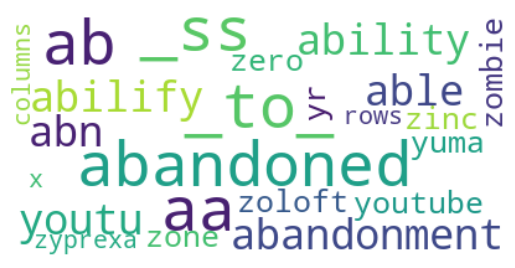

In [29]:
# Sum the TF-IDF scores for each word
word_frequencies = tdidf_df.sum(axis=0).to_dict()

# Generate WordCloud
wordcloud = WordCloud(background_color='white', max_words=50, max_font_size=50, random_state=42).generate_from_frequencies(word_frequencies)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Training for Logistical Regression Model

In [30]:
# Initialize the model
lrg = LogisticRegression()

# Train the model
lrg.fit(X_train, y_train)


LogisticRegression()

               precision    recall  f1-score   support

         Army       0.69      0.96      0.80       201
         USMC       0.79      0.22      0.35        86
      bipolar       0.84      0.92      0.88       150
schizophrenia       0.89      0.64      0.74       109

     accuracy                           0.77       546
    macro avg       0.80      0.69      0.69       546
 weighted avg       0.79      0.77      0.74       546



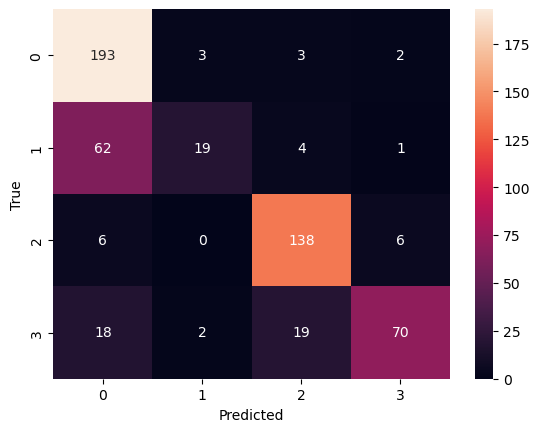

In [31]:
# Make predictions on the test set
y_pred_lr = lrg.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_lr)) #Ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

# Plot confusion matrix
cm_lrg = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lrg, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [32]:
# Define parameter grid for GridSearch
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']}

# Initialize Grid Search
grid_search = GridSearchCV(LogisticRegression(),
                           param_grid,
                           cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters: ", grid_search.best_params_)

# Re-evaluate with the best parameters
best_model = grid_search.best_estimator_
y_pred_best_lr = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best_lr))

Best Parameters:  {'C': 10, 'solver': 'newton-cg'}
               precision    recall  f1-score   support

         Army       0.79      0.90      0.84       201
         USMC       0.72      0.49      0.58        86
      bipolar       0.83      0.88      0.85       150
schizophrenia       0.75      0.71      0.73       109

     accuracy                           0.79       546
    macro avg       0.78      0.74      0.75       546
 weighted avg       0.78      0.79      0.78       546



In [33]:
# Variables 
feature_names = vectorizer.get_feature_names_out()
coefficients = lrg.coef_

for _, class_label in enumerate(lrg.classes_): #Ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    class_coefficients = coefficients[_]
    sorted_indices = np.argsort(class_coefficients)

    top_positive_words = [feature_names[i] for i in sorted_indices[-20:]]
    top_negative_words = [feature_names[i] for i in sorted_indices[:20]]

    print(f"Class: {class_label}")
    print("Top Positive Influential Words:", top_positive_words)
    print("Top Negative Influential Words:", top_negative_words)
    print()

Class: Army
Top Positive Influential Words: ['active', 'recruiter', 'ets', 'guard', 'hbl', 'pt', 'airborne', 'date', 'basic', 'civilian', 'leave', 'military', 'duty', 'fort', 'mo', 'station', 'unit', 'ait', 'soldier', 'army']
Top Negative Influential Words: ['marine', 'feel', 'med', 'bipolar', 'episode', 'schizophrenia', 'sleep', 'think', 'symptom', 'like', 'diagnosed', 'feeling', 'medication', 'voice', 'manic', 'mind', 'mg', 'psychosis', 'psychiatrist', 'relationship']

Class: USMC
Top Positive Influential Words: ['bunch', 'lejeune', 'force', 'boot', 'cpl', 'sgt', 'belt', 'got', 'device', 'score', 'yall', 'devil', 'guy', 'order', 'semper', 'issued', 'usmc', 'base', 'corp', 'marine']
Top Negative Influential Words: ['feel', 'med', 'bipolar', 'schizophrenia', 'episode', 'people', 'friend', 'time', 'thing', 'happy', 'job', 'know', 'army', 'year', 'life', 'much', 'help', 'medication', 'week', 'ait']

Class: bipolar
Top Positive Influential Words: ['never', 'disorder', 'relationship', 'hyp

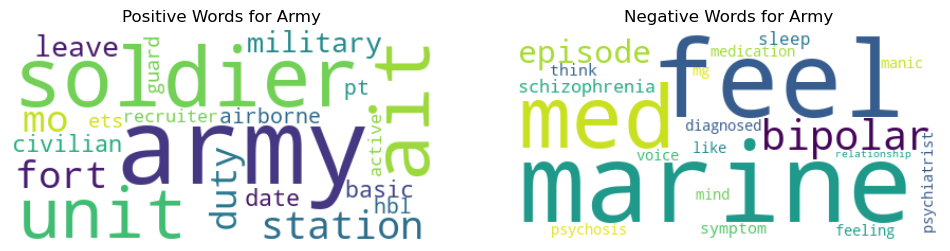

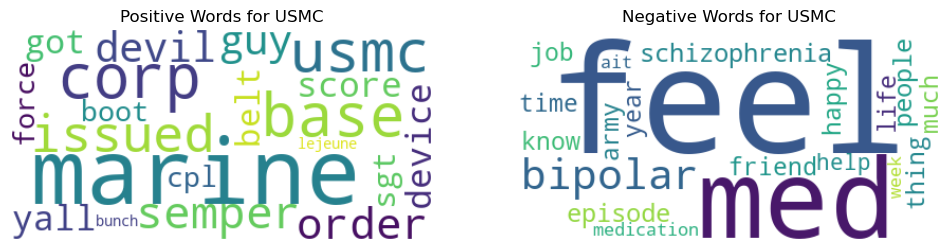

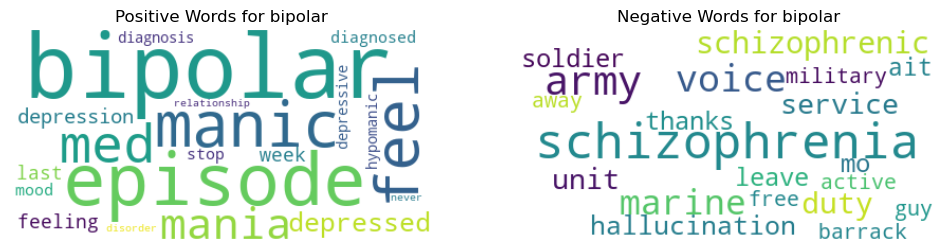

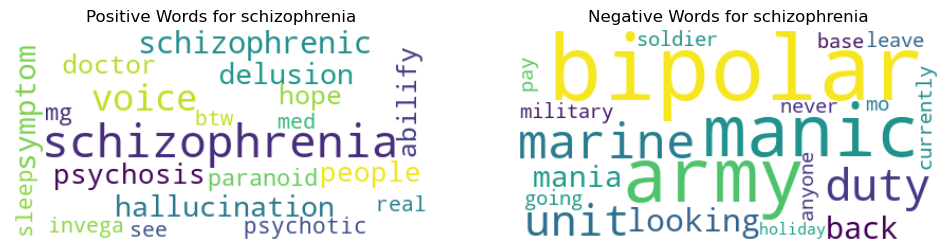

In [43]:
for index, class_label in enumerate(lrg.classes_):
    class_coefficients = coefficients[index]
    sorted_indices = np.argsort(class_coefficients)

    # Top 20 Positive and Negative Words with Coefficients
    top_positive_words = {feature_names[i]: abs(class_coefficients[i]) for i in sorted_indices[-20:]}
    top_negative_words = {feature_names[i]: abs(class_coefficients[i]) for i in sorted_indices[:20]}

    # Generate Word Clouds for Positive and Negative Words
    wordcloud_positive = WordCloud(background_color='white').generate_from_frequencies(top_positive_words)
    wordcloud_negative = WordCloud(background_color='white').generate_from_frequencies(top_negative_words)

    # Display Word Clouds
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(wordcloud_positive, interpolation='bilinear')
    plt.title(f'Positive Words for {class_label}')
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(wordcloud_negative, interpolation='bilinear')
    plt.title(f'Negative Words for {class_label}')
    plt.axis("off")

    plt.show()

## Training for Naive Bayes Regression Model

In [34]:
# Initialize and train the Multinomial Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

               precision    recall  f1-score   support

         Army       0.70      0.95      0.80       201
         USMC       0.75      0.03      0.07        86
      bipolar       0.64      0.97      0.77       150
schizophrenia       0.90      0.35      0.50       109

     accuracy                           0.69       546
    macro avg       0.75      0.58      0.54       546
 weighted avg       0.73      0.69      0.62       546



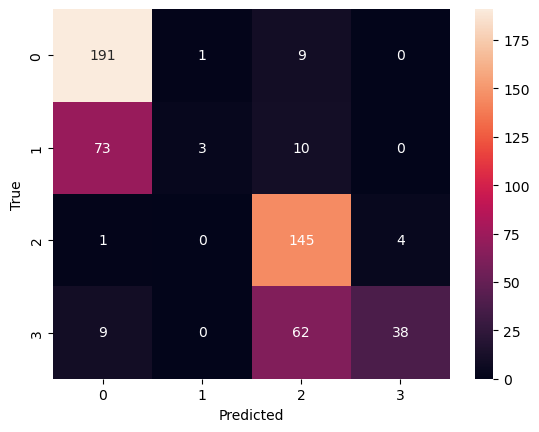

In [35]:
# Predict on the test set
y_pred_mnb = mnb.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_mnb))

# Plot the confusion matrix
cm_mnb = confusion_matrix(y_test, y_pred_mnb)
sns.heatmap(cm_mnb, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [36]:
# Define a parameter grid for GridSearch
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]
    }

# Initialize and perform the grid search
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Re-evaluate using the best model
best_model = grid_search.best_estimator_
y_pred_best_mnb = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best_mnb))

Best Parameters:  {'alpha': 0.1}
               precision    recall  f1-score   support

         Army       0.76      0.93      0.84       201
         USMC       0.80      0.28      0.41        86
      bipolar       0.73      0.91      0.81       150
schizophrenia       0.78      0.61      0.69       109

     accuracy                           0.76       546
    macro avg       0.77      0.68      0.69       546
 weighted avg       0.76      0.76      0.73       546



In [37]:
# Variables 

log_prob = mnb.feature_log_prob_ #There are no coefficients in Multinomial Naive Bayes, instead we have log probabilities

for _, class_label in enumerate(mnb.classes_):
    class_log_probabilities = log_prob[_]
    sorted_indices = np.argsort(class_log_probabilities)

    top_words = [feature_names[i] for i in sorted_indices[-20:]]  # Top 20 words

    print(f"Class: {class_label}")
    print("Top Influential Words:", top_words)
    print()

Class: Army
Top Influential Words: ['day', 'back', 'take', 'one', 'ait', 'leave', 'time', 'got', 'anyone', 'want', 'unit', 'duty', 'like', 'going', 'would', 'go', 'year', 'know', 'get', 'army']

Class: USMC
Top Influential Words: ['think', 'getting', 'work', 'looking', 'base', 'want', 'year', 'back', 'corp', 'amp', 'know', 'go', 'would', 'one', 'guy', 'get', 'like', 'anyone', 'got', 'marine']

Class: bipolar
Top Influential Words: ['feeling', 'think', 'even', 'anyone', 'depression', 'really', 'thing', 'day', 'life', 'manic', 'want', 'time', 'med', 'year', 'get', 'know', 'episode', 'bipolar', 'like', 'feel']

Class: schizophrenia
Top Influential Words: ['go', 'help', 'med', 'think', 'thought', 'make', 'symptom', 'really', 'year', 'day', 'want', 'thing', 'get', 'time', 'voice', 'know', 'people', 'feel', 'like', 'schizophrenia']



## Training for Random Forest Classifier Model

In [38]:
# Train the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

               precision    recall  f1-score   support

         Army       0.68      0.92      0.78       201
         USMC       0.90      0.21      0.34        86
      bipolar       0.79      0.91      0.85       150
schizophrenia       0.88      0.64      0.74       109

     accuracy                           0.75       546
    macro avg       0.81      0.67      0.68       546
 weighted avg       0.78      0.75      0.72       546



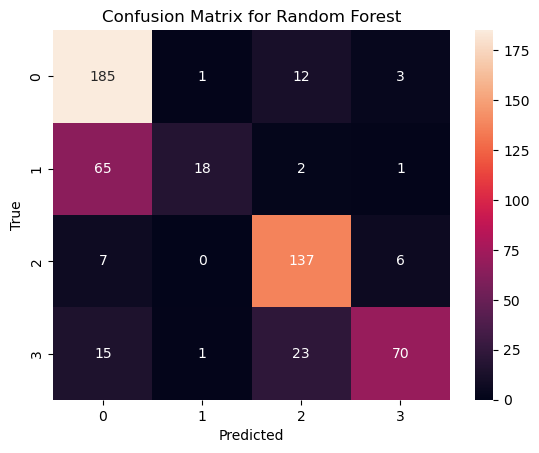

In [39]:
# Make predictions
y_pred_rf = rf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_rf))

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [40]:
importances = rf.feature_importances_
indices = np.argsort(importances)[-20:]  # Top 20 features (Not separated by class)

top_features = [(feature_names[i], importances[i]) for i in indices]
print("Top Features and Words:")
for feature, importance in top_features:
    print(f"{feature}: {importance}")

Top Features and Words:
get: 0.004343190903153133
depression: 0.004419961475143963
thing: 0.004738726478236006
thought: 0.004744810544651268
think: 0.00474920639412256
medication: 0.005383414364650903
people: 0.005442175126263902
symptom: 0.006034836548110001
diagnosed: 0.006385645656232504
voice: 0.006992369812326687
feeling: 0.007073987538574823
like: 0.007094901473598524
med: 0.010106915650138899
episode: 0.01212050983541212
manic: 0.01341049206892553
army: 0.013518720264777493
feel: 0.016082197791779898
marine: 0.01688149516833012
schizophrenia: 0.01984980249530696
bipolar: 0.022227767274613036


## Training for KNN Model

In [41]:
# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

               precision    recall  f1-score   support

         Army       0.34      0.44      0.38       201
         USMC       0.00      0.00      0.00        86
      bipolar       0.00      0.00      0.00       150
schizophrenia       0.22      0.56      0.32       109

     accuracy                           0.27       546
    macro avg       0.14      0.25      0.17       546
 weighted avg       0.17      0.27      0.20       546



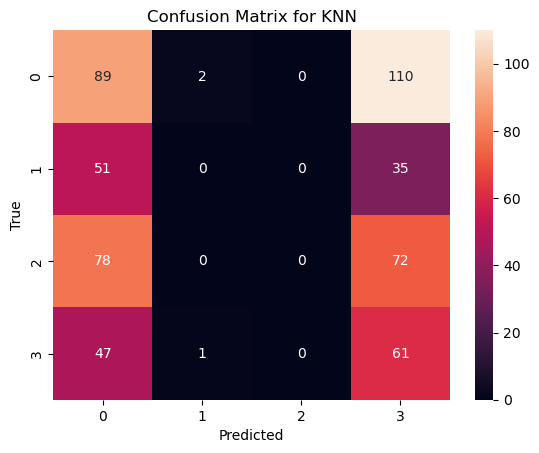

In [42]:
# Make predictions
y_pred_knn = knn.predict(X_test) #Results due to having more than 2 classes/ Considering breaking down into 2 classes

# Print classification report
print(classification_report(y_test, y_pred_knn))

# Confusion matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d')
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()